In [15]:
sent = []

with open('test_data/simu_test_sim.out') as f:
    for line in f:
        segments = line.split(' ')
        
        if len(segments) == 9:
            device_id = int(line.split(' ')[5])
            tst = int(line.split(' ')[8])
            
            sent.append((tst, device_id))
            

In [105]:
import sqlite3

connection = sqlite3.connect('test_data/simu_test_device')
cursor = connection.cursor()

cursor.execute("SELECT message, timestamp FROM log_table WHERE category = 'NetworkLocationReceiver' AND message LIKE 'Device ID%'")

data = [(t[1], int(t[0].split(' ')[2])) for t in list(cursor)]
data = [t for t in data if t[1] != 1242062628]



In [106]:
connection = sqlite3.connect('test_data/simu_test_device')
cursor = connection.cursor()

cursor.execute("SELECT timestamp FROM log_table WHERE category = 'NetworkLocationReceiver' AND level = 300")

error = [t[0] for t in list(cursor)]

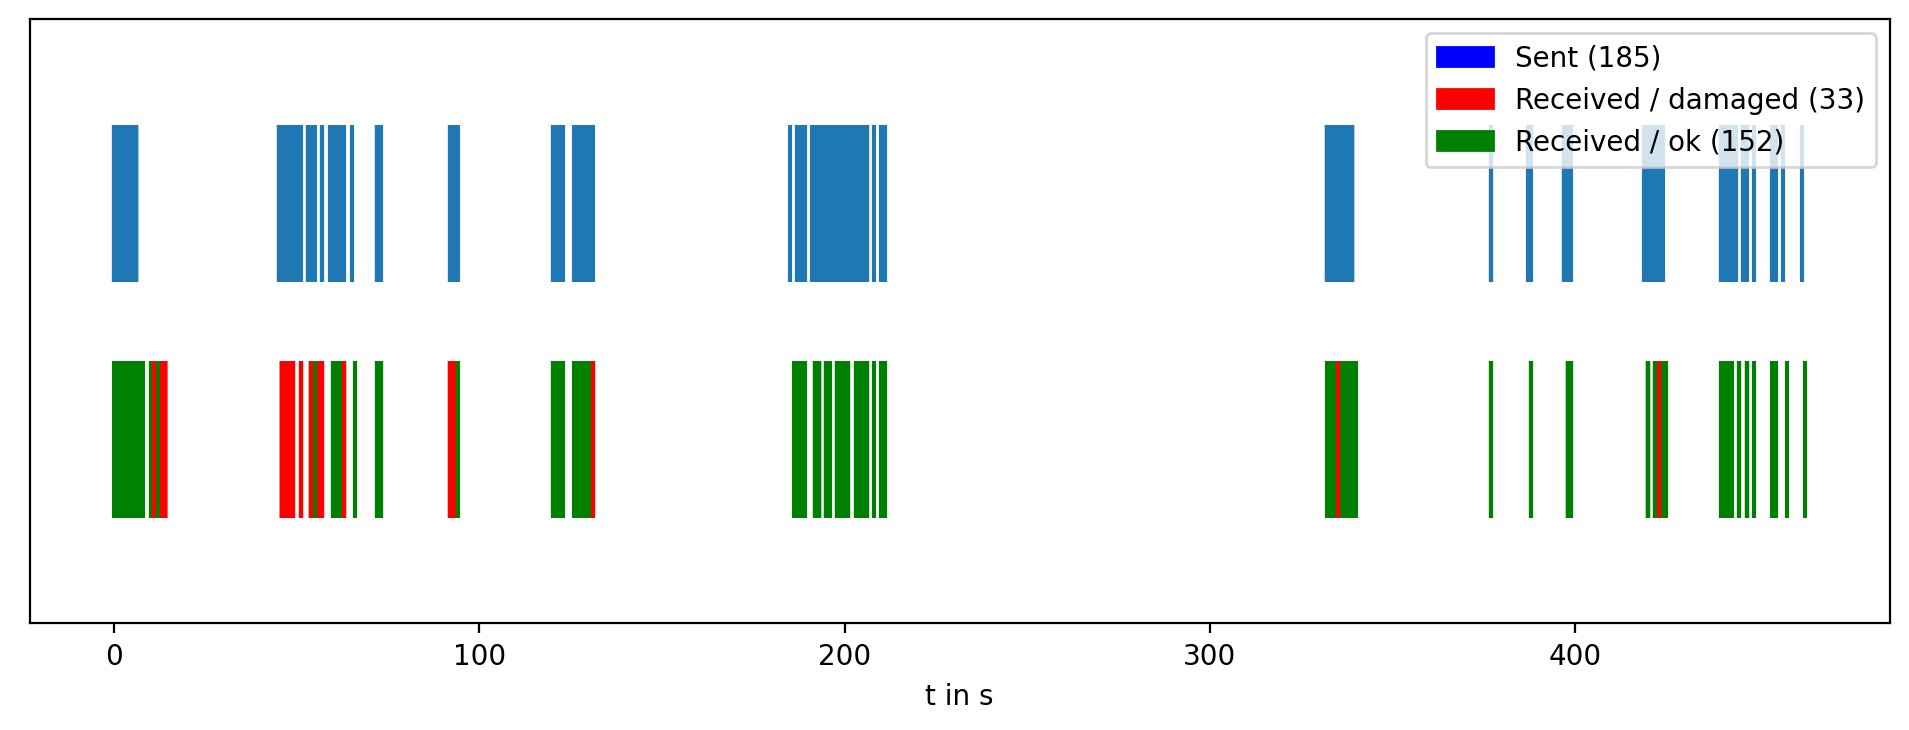

In [109]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

_, ax = plt.subplots(1, figsize = (12, 4), dpi = 200)

ax.legend(handles=[
    mpatches.Patch(color='blue', label='Sent (' + str(len(sent)) + ')'),
    mpatches.Patch(color='red', label='Received / damaged (' + str(len(error)) + ')'),
    mpatches.Patch(color='green', label='Received / ok (' + str(len(data) - len(error)) + ')')
])

minTs = min([t[0] for t in data])
maxTs = max([t[0] for t in data])

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xlabel('t in s')

ax.eventplot([t[0] - minTs for t in sent], lineoffsets = 0.3, linelengths = 0.2)
ax.eventplot([t[0] - minTs for t in data], lineoffsets = 0, linelengths = 0.2, color = 'green')
ax.eventplot([t - minTs for t in error], lineoffsets = 0, linelengths = 0.2, color = 'red')

